In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import yfinance as yf
import os

In [2]:
df = pd.read_csv('all_stocks_5yr.csv')
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [3]:
df['date'] = pd.to_datetime(df['date'], format="%Y/%m/%d")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    619040 non-null  datetime64[ns]
 1   open    619029 non-null  float64       
 2   high    619032 non-null  float64       
 3   low     619032 non-null  float64       
 4   close   619040 non-null  float64       
 5   volume  619040 non-null  int64         
 6   Name    619040 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 33.1+ MB


In [5]:
df['Name'].unique().shape

(505,)

In [6]:
df[df['Name'] == 'AAPL']

,date,open,high,low,close,volume,Name
1259,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1260,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
1261,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
1262,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
1263,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL
...,...,...,...,...,...,...,...
2513,2018-02-01,167.1650,168.6200,166.7600,167.7800,47230787,AAPL
2514,2018-02-02,166.0000,166.8000,160.1000,160.5000,86593825,AAPL
2515,2018-02-05,159.1000,163.8800,156.0000,156.4900,72738522,AAPL
2516,2018-02-06,154.8300,163.7200,154.0000,163.0300,68243838,AAPL


In [7]:
ibm = df[df['Name'] == 'IBM']
ibm.head()

,date,open,high,low,close,volume,Name
290491,2013-02-08,199.97,202.090,199.68,201.68,2893254,IBM
290492,2013-02-11,200.98,201.950,199.75,200.16,2944651,IBM
290493,2013-02-12,200.01,200.735,199.02,200.04,2461779,IBM
290494,2013-02-13,200.65,200.950,199.57,200.09,2169757,IBM
290495,2013-02-14,199.73,200.320,199.26,199.65,3294126,IBM


In [8]:
ibm.set_index('date', inplace=True)

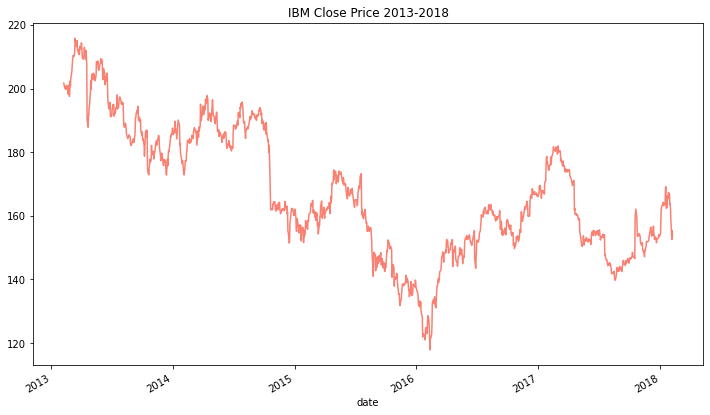

In [9]:
ibm['close'].plot(figsize=(12, 7), color='salmon')

plt.title('IBM Close Price 2013-2018')
plt.show();

In [10]:
df['date'].min(), df['date'].max()

(Timestamp('2013-02-08 00:00:00'), Timestamp('2018-02-07 00:00:00'))

In [11]:
dates = pd.date_range(df['date'].min(), df['date'].max())
dates

DatetimeIndex(['2013-02-08', '2013-02-09', '2013-02-10', '2013-02-11',
               '2013-02-12', '2013-02-13', '2013-02-14', '2013-02-15',
               '2013-02-16', '2013-02-17',
               ...
               '2018-01-29', '2018-01-30', '2018-01-31', '2018-02-01',
               '2018-02-02', '2018-02-03', '2018-02-04', '2018-02-05',
               '2018-02-06', '2018-02-07'],
              dtype='datetime64[ns]', length=1826, freq='D')

In [12]:
close_prices = pd.DataFrame(index=dates)
close_prices.head()

""
2013-02-08
2013-02-09
2013-02-10
2013-02-11
2013-02-12


In [13]:
close_prices.tail()

""
2018-02-03
2018-02-04
2018-02-05
2018-02-06
2018-02-07


In [14]:
symbols = df['Name'].unique()

In [15]:
import random
stocks = random.sample(list(symbols), 100)

small_symbols = ['MMM', 'ABT', 'ABBV', 'ACN', 'ATVI', 'ADBE', 'AMD', 'AAP', 'AES',
  'AFL', 'AKAM', 'IBM', 'GOOG', 'SBUX', 'AAPL', 'SPY']

for i in small_symbols:
    if i not in stocks:
        stocks.append(i)

stocks

['DGX',
 'EMN',
 'TSN',
 'FBHS',
 'ADM',
 'XOM',
 'EXPE',
 'BHGE',
 'USB',
 'TDG',
 'DISCA',
 'ROP',
 'GD',
 'CFG',
 'CBOE',
 'NWL',
 'TSS',
 'HRS',
 'GOOGL',
 'CVX',
 'PWR',
 'BLK',
 'GPC',
 'COG',
 'WBA',
 'IDXX',
 'AWK',
 'LMT',
 'DRI',
 'HD',
 'CB',
 'SJM',
 'MDLZ',
 'NAVI',
 'HBI',
 'RTN',
 'KR',
 'WMB',
 'BAC',
 'MAA',
 'NBL',
 'ORCL',
 'MAC',
 'RRC',
 'ALXN',
 'VAR',
 'OKE',
 'AEP',
 'GOOG',
 'DE',
 'T',
 'PKG',
 'ECL',
 'NTRS',
 'UNH',
 'SRCL',
 'FTV',
 'ATVI',
 'CL',
 'STX',
 'CF',
 'PFE',
 'SPG',
 'WU',
 'MSI',
 'TSCO',
 'HON',
 'APH',
 'HST',
 'LLY',
 'MCHP',
 'SLB',
 'CMA',
 'IRM',
 'IBM',
 'MOS',
 'SNPS',
 'CAT',
 'LEN',
 'NVDA',
 'SNA',
 'WDC',
 'XL',
 'HBAN',
 'AMZN',
 'KEY',
 'HPQ',
 'TXT',
 'PRU',
 'CCL',
 'PYPL',
 'DWDP',
 'BAX',
 'UAL',
 'EA',
 'SIG',
 'SO',
 'APD',
 'PKI',
 'AMT',
 'MMM',
 'ABT',
 'ABBV',
 'ACN',
 'ADBE',
 'AMD',
 'AAP',
 'AES',
 'AFL',
 'AKAM',
 'SBUX',
 'AAPL',
 'SPY']

In [16]:
for symbol in stocks:
    df_sym = df[df['Name'] == symbol]
    df_tmp = pd.DataFrame(data = df_sym['close'].to_numpy(),
                            index = df_sym['date'], 
                            columns = [symbol])
    
    close_prices = close_prices.join(df_tmp)

In [17]:
close_prices.head()

,DGX,EMN,TSN,FBHS,ADM,XOM,EXPE,BHGE,USB,TDG,...,ACN,ADBE,AMD,AAP,AES,AFL,AKAM,SBUX,AAPL,SPY
2013-02-08,58.50,73.31,23.78,33.61,30.22,88.61,65.65,NaN,33.65,143.05,...,73.31,39.12,2.59,78.90,11.07,50.35,35.42,28.185,67.8542,NaN
2013-02-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-02-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-02-11,57.93,74.13,23.64,33.55,30.28,88.28,64.80,NaN,34.09,145.18,...,73.07,38.64,2.67,78.39,11.20,50.26,35.31,28.070,68.5614,NaN
2013-02-12,56.88,73.93,23.51,34.60,30.81,88.46,65.55,NaN,34.31,144.91,...,73.37,38.89,2.77,78.60,11.31,49.50,36.74,28.130,66.8428,NaN


In [18]:
close_prices.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1826 entries, 2013-02-08 to 2018-02-07
Freq: D
Columns: 113 entries, DGX to SPY
dtypes: float64(113)
memory usage: 1.7 MB


### Save my df to a csv and then load it 

In [19]:
close_prices.to_csv('sp500ran.csv')

In [20]:
close2 = pd.read_csv('sp500ran.csv', index_col=0, parse_dates=True)
close2.head()

,DGX,EMN,TSN,FBHS,ADM,XOM,EXPE,BHGE,USB,TDG,...,ACN,ADBE,AMD,AAP,AES,AFL,AKAM,SBUX,AAPL,SPY
2013-02-08,58.50,73.31,23.78,33.61,30.22,88.61,65.65,NaN,33.65,143.05,...,73.31,39.12,2.59,78.90,11.07,50.35,35.42,28.185,67.8542,NaN
2013-02-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-02-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-02-11,57.93,74.13,23.64,33.55,30.28,88.28,64.80,NaN,34.09,145.18,...,73.07,38.64,2.67,78.39,11.20,50.26,35.31,28.070,68.5614,NaN
2013-02-12,56.88,73.93,23.51,34.60,30.81,88.46,65.55,NaN,34.31,144.91,...,73.37,38.89,2.77,78.60,11.31,49.50,36.74,28.130,66.8428,NaN


## Deal with the missing data

<AxesSubplot:>

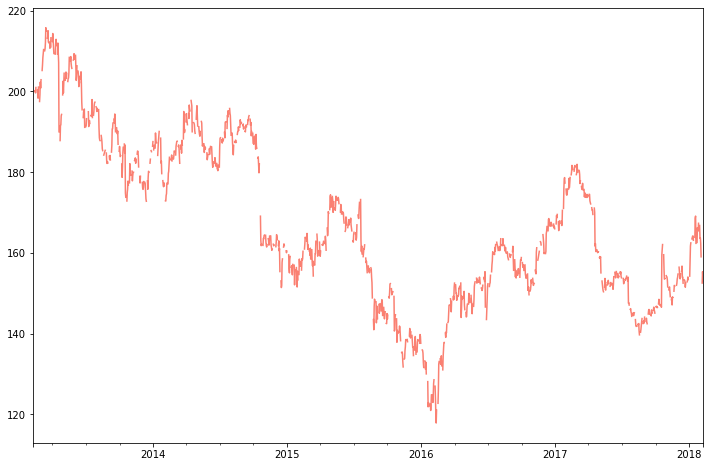

In [21]:
close_prices['IBM'].plot(figsize=(12, 8), color='salmon')

In [22]:
# drop rows with all nan
# rows where all data is missing - most likely corresponds to weekends, holidays, (non-trading days)
close_prices.dropna(axis=0, how='all', inplace=True)

<AxesSubplot:>

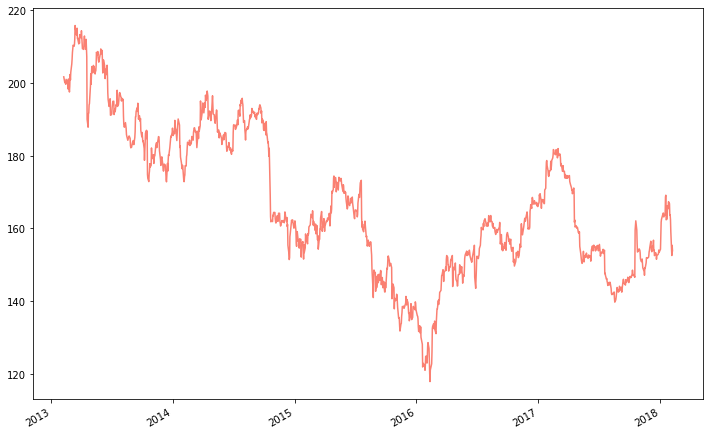

In [23]:
close_prices['IBM'].plot(figsize=(12, 8), color='salmon')

In [24]:
# number of missing values in my data
close_prices.isna().sum().sum()

6647

In [25]:
# when the stock does not have an initial value - must be backwardfill
close_prices.iloc[0, :].isna().sum()

9

In [26]:
close_prices.fillna(method='ffill', inplace=True)

In [27]:
close_prices.isna().sum().sum()

6645

In [28]:
close_prices.fillna(method='bfill', inplace=True)

In [29]:
close_prices.isna().sum().sum()

1259

In [30]:
close_prices.drop(columns=['SPY'], inplace=True)

In [31]:
close_prices.isna().sum().sum()

0

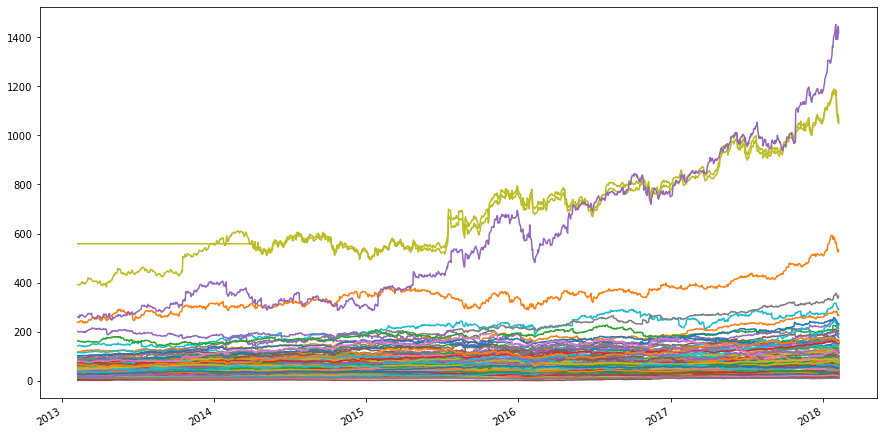

In [32]:
close_prices.plot(legend=False, figsize=(15, 8));

## Cummulative return of the stocks 

plot the relative stock price over time - compare growth

In [33]:
# frist row of my data
close_prices.iloc[0]

DGX     58.5000
EMN     73.3100
TSN     23.7800
FBHS    33.6100
ADM     30.2200
         ...   
AES     11.0700
AFL     50.3500
AKAM    35.4200
SBUX    28.1850
AAPL    67.8542
Name: 2013-02-08 00:00:00, Length: 112, dtype: float64

In [34]:
close_prices_normalized = close_prices / close_prices.iloc[0]

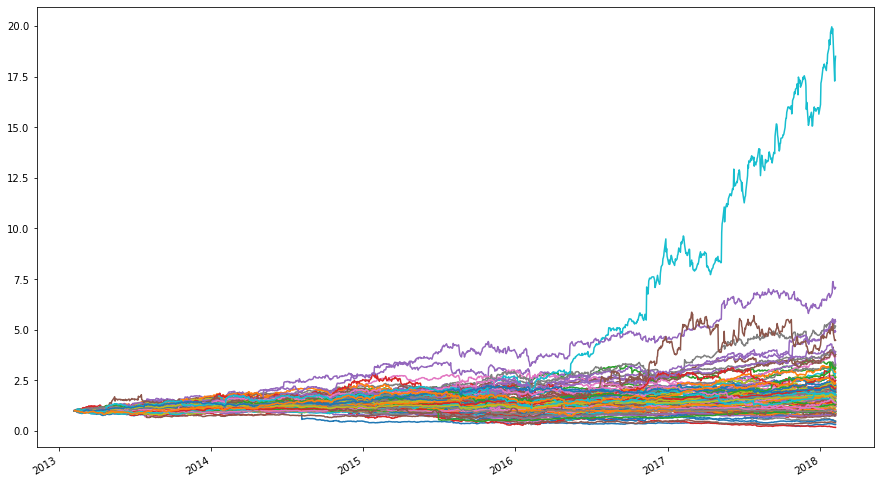

In [35]:
close_prices_normalized.plot(legend=False, figsize=(15, 9));

In [36]:
close_prices_normalized.max()

DGX     1.900171
EMN     1.395580
TSN     3.516400
FBHS    2.175841
ADM     1.777300
          ...   
AES     1.406504
AFL     1.821053
AKAM    2.212309
SBUX    2.290935
AAPL    2.641841
Length: 112, dtype: float64

## Adjusted Close Prices

In [37]:
df = pd.read_csv('sp500sub.csv',index_col='Date', parse_dates=True)

In [38]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Name
Date,,,,,,,
2010-01-04,9.22,9.51,9.17,9.50,9.50,1865400.0,INCY
2010-01-05,9.51,10.29,9.45,10.27,10.27,7608900.0,INCY
2010-01-06,10.38,11.09,10.35,11.00,11.00,8046700.0,INCY
2010-01-07,11.00,11.06,10.62,10.82,10.82,3680300.0,INCY
2010-01-08,10.82,11.00,10.75,10.94,10.94,1529300.0,INCY


<AxesSubplot:xlabel='Date'>

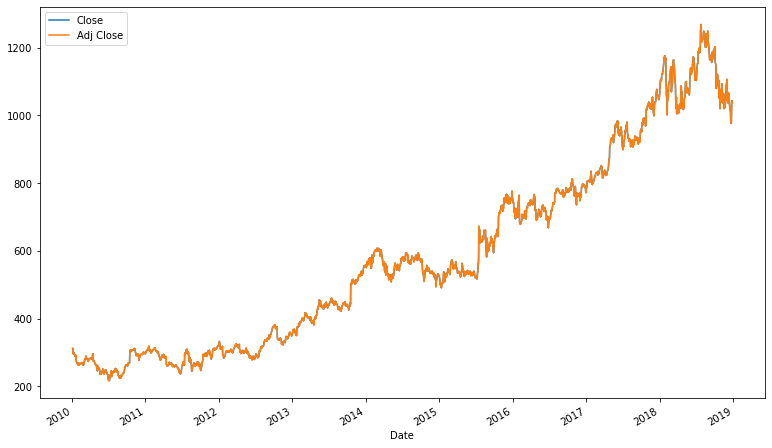

In [40]:
google = df[df['Name'] == 'GOOG']
google[['Close', 'Adj Close']].plot(figsize=(13, 8))

<AxesSubplot:xlabel='Date'>

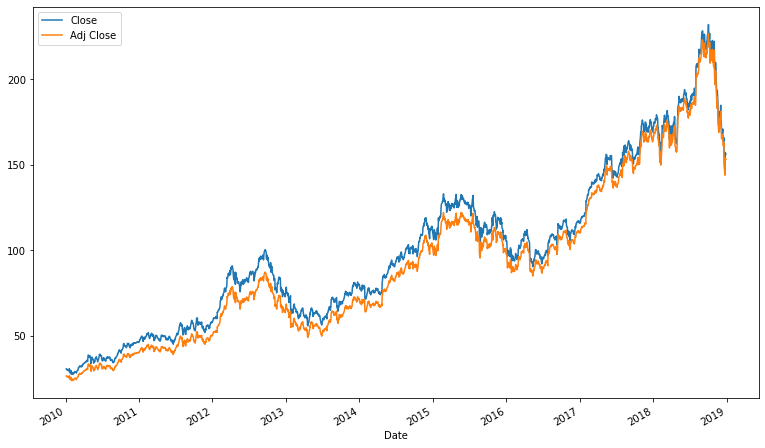

In [41]:
# dividends pay shown in the adj close prices
apple = df[df['Name'] == 'AAPL']
apple[['Close', 'Adj Close']].plot(figsize=(13, 8))

## Returns

In [3]:
cmpc = yf.download('CMPC.SN', start='2012-01-01', end='2022-06-09')

[*********************100%***********************]  1 of 1 completed


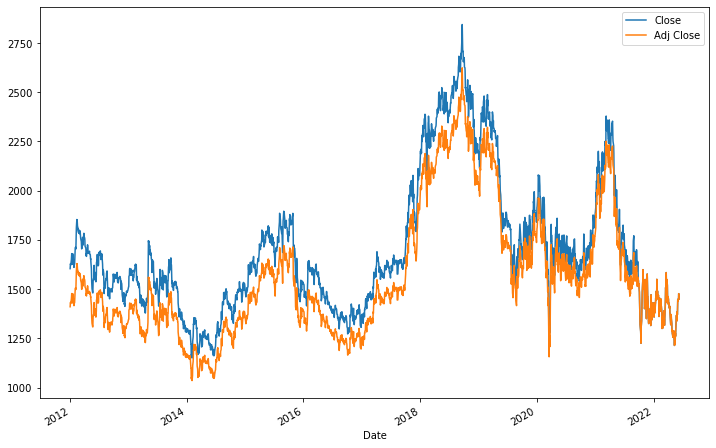

In [4]:
cmpc[['Close', 'Adj Close']].plot(figsize=(12, 8));

# First Method to calculate returns

In [5]:
cmpc['prev_close'] = cmpc['Adj Close'].shift(1)

In [6]:
cmpc.head()

,Open,High,Low,Close,Adj Close,Volume,prev_close
Date,,,,,,,
2012-01-02,1609.827026,1608.138672,1595.476196,1603.917847,1410.328735,3755153,NaN
2012-01-03,1603.917847,1637.684570,1612.275146,1620.632324,1425.025391,2433605,1410.328735
2012-01-04,1620.632324,1637.684570,1614.891968,1628.820801,1432.225830,1828359,1425.025391
2012-01-05,1628.820801,1627.048096,1616.580322,1624.093506,1428.069458,869211,1432.225830
2012-01-06,1624.093506,1629.242920,1604.339966,1622.742798,1426.881470,1537585,1428.069458


In [7]:
cmpc['return'] = cmpc['Adj Close'] / cmpc['prev_close'] - 1

In [8]:
cmpc.head()

,Open,High,Low,Close,Adj Close,Volume,prev_close,return
Date,,,,,,,,
2012-01-02,1609.827026,1608.138672,1595.476196,1603.917847,1410.328735,3755153,NaN,NaN
2012-01-03,1603.917847,1637.684570,1612.275146,1620.632324,1425.025391,2433605,1410.328735,0.010421
2012-01-04,1620.632324,1637.684570,1614.891968,1628.820801,1432.225830,1828359,1425.025391,0.005053
2012-01-05,1628.820801,1627.048096,1616.580322,1624.093506,1428.069458,869211,1432.225830,-0.002902
2012-01-06,1624.093506,1629.242920,1604.339966,1622.742798,1426.881470,1537585,1428.069458,-0.000832


## Second Method

In [9]:
cmpc['return_2'] = cmpc['Adj Close'].pct_change(1)
cmpc.head()

,Open,High,Low,Close,Adj Close,Volume,prev_close,return,return_2
Date,,,,,,,,,
2012-01-02,1609.827026,1608.138672,1595.476196,1603.917847,1410.328735,3755153,NaN,NaN,NaN
2012-01-03,1603.917847,1637.684570,1612.275146,1620.632324,1425.025391,2433605,1410.328735,0.010421,0.010421
2012-01-04,1620.632324,1637.684570,1614.891968,1628.820801,1432.225830,1828359,1425.025391,0.005053,0.005053
2012-01-05,1628.820801,1627.048096,1616.580322,1624.093506,1428.069458,869211,1432.225830,-0.002902,-0.002902
2012-01-06,1624.093506,1629.242920,1604.339966,1622.742798,1426.881470,1537585,1428.069458,-0.000832,-0.000832


<AxesSubplot:>

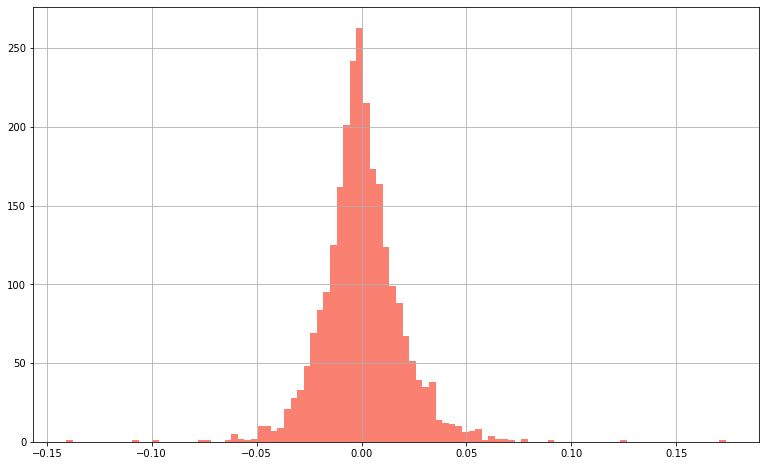

In [10]:
cmpc['return'].hist(bins=100, figsize=(13, 8), color='salmon')

In [11]:
cmpc['return'].mean(), cmpc['return'].std()

(0.000186713658973969, 0.01880008870908848)

In [12]:
cmpc['log_return'] = np.log(cmpc['return'] + 1)

In [13]:
cmpc.head()

,Open,High,Low,Close,Adj Close,Volume,prev_close,return,return_2,log_return
Date,,,,,,,,,,
2012-01-02,1609.827026,1608.138672,1595.476196,1603.917847,1410.328735,3755153,NaN,NaN,NaN,NaN
2012-01-03,1603.917847,1637.684570,1612.275146,1620.632324,1425.025391,2433605,1410.328735,0.010421,0.010421,0.010367
2012-01-04,1620.632324,1637.684570,1614.891968,1628.820801,1432.225830,1828359,1425.025391,0.005053,0.005053,0.005040
2012-01-05,1628.820801,1627.048096,1616.580322,1624.093506,1428.069458,869211,1432.225830,-0.002902,-0.002902,-0.002906
2012-01-06,1624.093506,1629.242920,1604.339966,1622.742798,1426.881470,1537585,1428.069458,-0.000832,-0.000832,-0.000832


<AxesSubplot:xlabel='Date'>

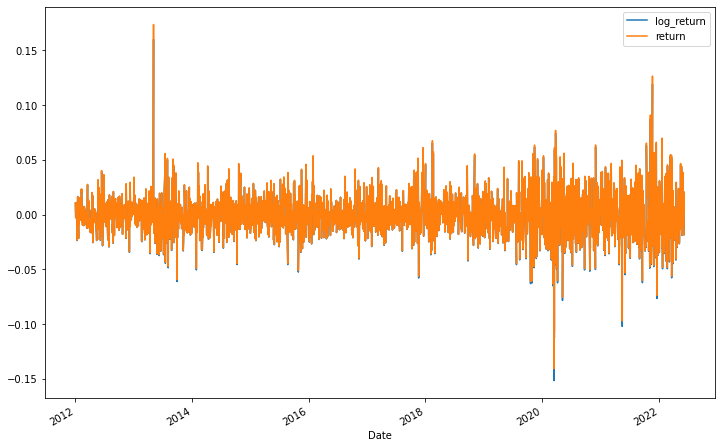

In [14]:
cmpc[['log_return', 'return']].plot(figsize=(12, 8))

### Normal Distribution

In [15]:
from scipy.stats import norm

In [16]:
x_list = np.linspace(cmpc['return'].min(), cmpc['return'].max(), 100)

In [17]:
y_list = norm.pdf(x_list,loc=cmpc['return'].mean(), scale=cmpc['return'].std())

<AxesSubplot:>

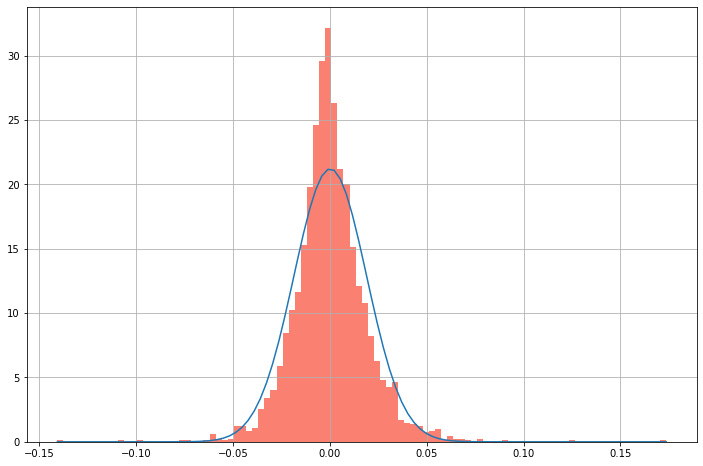

In [18]:
plt.plot(x_list, y_list)
cmpc['return'].hist(bins=100, density=True, figsize=(12, 8), color='salmon')

In [19]:
from scipy.stats import probplot

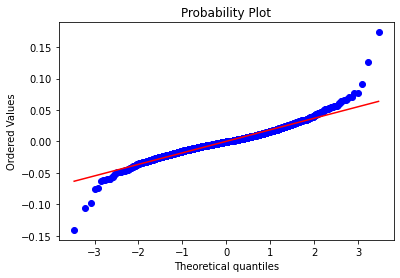

In [20]:
probplot(cmpc['return'].dropna(), dist='norm', fit=True, plot=plt);

## Same plot but using statsmodels

In [21]:
import statsmodels.api as sm

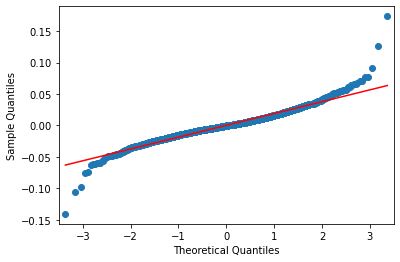

In [22]:
sm.qqplot(cmpc['return'].dropna(), line='s');

### Same but for log returns

In [23]:
x_log = np.linspace(cmpc['log_return'].min(), cmpc['log_return'].max(), 100)

In [24]:
y_log = norm.pdf(x_log,loc=cmpc['log_return'].mean(), scale=cmpc['log_return'].std())

<AxesSubplot:>

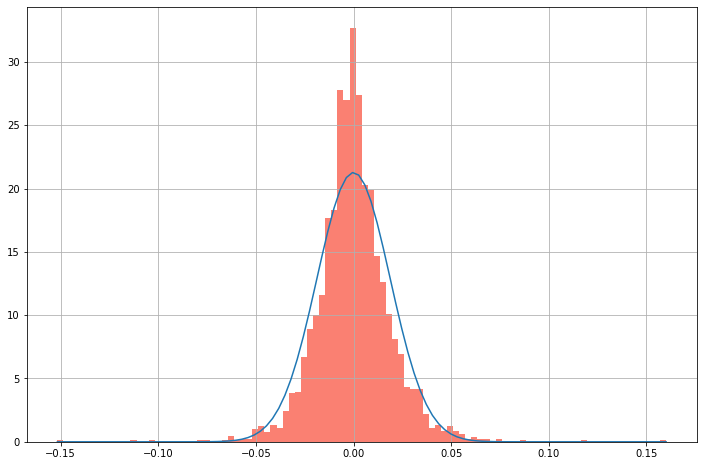

In [25]:
plt.plot(x_log, y_log)
cmpc['log_return'].hist(bins=100, density=True, figsize=(12, 8), color='salmon')

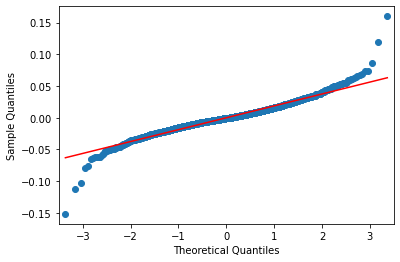

In [26]:
sm.qqplot(cmpc['log_return'].dropna(), line='s');

### t - distribution

In [27]:
from scipy.stats import t

In [28]:
x_list = np.linspace(cmpc['return'].min(), cmpc['return'].max(), 100)
params = t.fit(cmpc['return'].dropna())
params

(4.091544870170228, -0.0003768565789503375, 0.013622661948464593)

In [29]:
# degrees of freedom , location, scale
df, loc, scale = params

In [30]:
ylist = t.pdf(x_list, df, loc, scale)

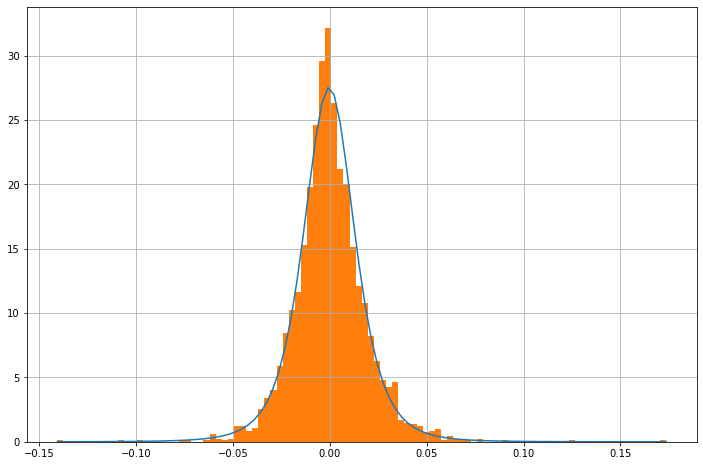

In [31]:
fig = plt.figure(figsize=(12, 8))

plt.plot(x_list, ylist)
cmpc['return'].hist(bins=100, density=True)

plt.show();

 #### The t-distribution better fit than the normal distribution

In [32]:
sm.qqplot(cmpc['return'].dropna(), dist=t, line='s');

TypeError: %s requires more parameters to compute ppf

In [33]:
# fix the error
class Myt:
    def __init__(self, df):
        self.df = df
        
    def fit(self, x):
        return t.fit(x)
    
    def ppf(self, x, loc=0, scale=1):
        return t.ppf(x, self.df, loc, scale)        

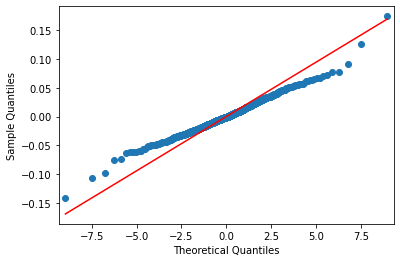

<Figure size 864x576 with 0 Axes>

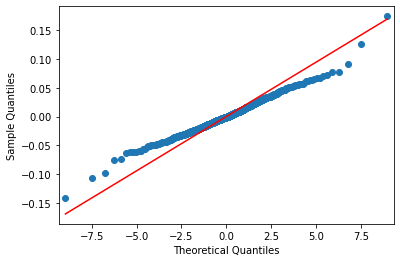

In [34]:
fig = plt.figure(figsize=(12, 8))

sm.qqplot(cmpc['return'].dropna(), dist=Myt(df), line='s')

<Figure size 864x576 with 0 Axes>

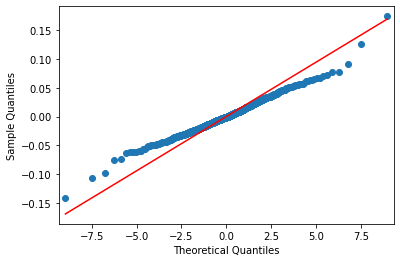

In [35]:
# fix bug above of two same plots 
fig = plt.figure(figsize=(12, 8))

fig = sm.qqplot(cmpc['return'].dropna(), dist=Myt(df), line='s')

#### Same but for log returns

In [36]:
cmpc.head()

,Open,High,Low,Close,Adj Close,Volume,prev_close,return,return_2,log_return
Date,,,,,,,,,,
2012-01-02,1609.827026,1608.138672,1595.476196,1603.917847,1410.328735,3755153,NaN,NaN,NaN,NaN
2012-01-03,1603.917847,1637.684570,1612.275146,1620.632324,1425.025391,2433605,1410.328735,0.010421,0.010421,0.010367
2012-01-04,1620.632324,1637.684570,1614.891968,1628.820801,1432.225830,1828359,1425.025391,0.005053,0.005053,0.005040
2012-01-05,1628.820801,1627.048096,1616.580322,1624.093506,1428.069458,869211,1432.225830,-0.002902,-0.002902,-0.002906
2012-01-06,1624.093506,1629.242920,1604.339966,1622.742798,1426.881470,1537585,1428.069458,-0.000832,-0.000832,-0.000832


In [37]:
x_list = np.linspace(cmpc['log_return'].min(), cmpc['log_return'].max(), 100)
params = t.fit(cmpc['log_return'].dropna())
params

(4.1358348099945825, -0.0003926370570927953, 0.013651146443338102)

In [38]:
df, loc, scale = params

In [39]:
y_list = t.pdf(x_list, df, loc, scale)

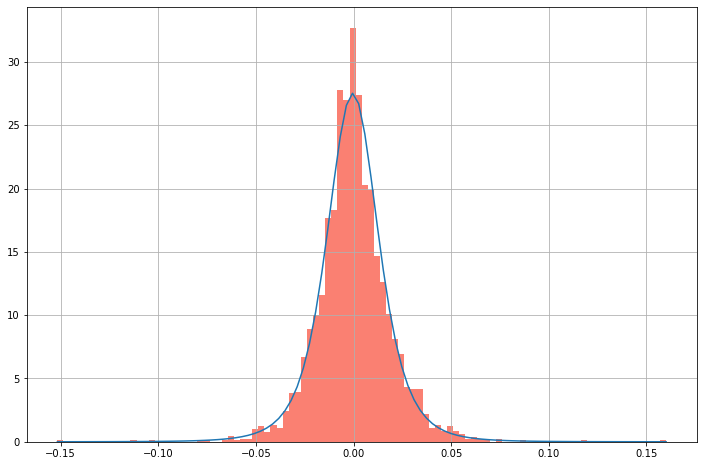

In [40]:
fig = plt.figure(figsize=(12, 8))

plt.plot(x_list, y_list)
cmpc['log_return'].hist(bins=100, density=True, color='salmon')

plt.show();

<Figure size 864x576 with 0 Axes>

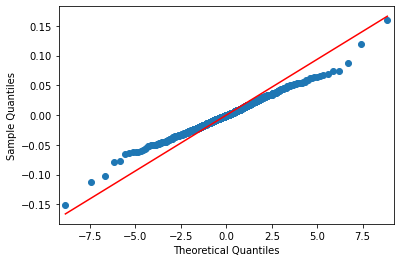

In [41]:
fig = plt.figure(figsize=(12, 8))
fig = sm.qqplot(cmpc['log_return'].dropna(), dist=Myt(df), line='s')

## Skewness and Kurtosis

In [42]:
tails = pd.DataFrame({'Skew': cmpc['return'].skew(), 
                     'Kurtosis': cmpc['return'].kurtosis()}, index=[0])
tails.head()

,Skew,Kurtosis
0,0.383478,6.31643


In [43]:
tails2 = pd.DataFrame({'Skew log': cmpc['log_return'].skew(), 
                     'Kurtosis log': cmpc['log_return'].kurtosis()}, index=[0])
tails2.head()

,Skew log,Kurtosis log
0,0.158732,5.962372


#### In both cases 
    Skew positive , slightly right tail more likely to get positive values
    Kurtosis grater than 0, more heavy tail than normal distribution, expect extreme values in general

In [44]:
# Generate skew and kurtosis from normal dist.
samp = pd.Series(np.random.randn(10000))
samp.skew(), samp.kurtosis()

(0.09413984623366284, 0.004387582187756145)

## Confidence Intervals

In [45]:
cmpc.head()

,Open,High,Low,Close,Adj Close,Volume,prev_close,return,return_2,log_return
Date,,,,,,,,,,
2012-01-02,1609.827026,1608.138672,1595.476196,1603.917847,1410.328735,3755153,NaN,NaN,NaN,NaN
2012-01-03,1603.917847,1637.684570,1612.275146,1620.632324,1425.025391,2433605,1410.328735,0.010421,0.010421,0.010367
2012-01-04,1620.632324,1637.684570,1614.891968,1628.820801,1432.225830,1828359,1425.025391,0.005053,0.005053,0.005040
2012-01-05,1628.820801,1627.048096,1616.580322,1624.093506,1428.069458,869211,1432.225830,-0.002902,-0.002902,-0.002906
2012-01-06,1624.093506,1629.242920,1604.339966,1622.742798,1426.881470,1537585,1428.069458,-0.000832,-0.000832,-0.000832


In [46]:
values = cmpc['return'].dropna().to_numpy()
values[0:5]

array([ 0.01042073,  0.00505285, -0.00290204, -0.00083188,  0.01108049])

In [47]:
m = values.mean()
s = values.std(ddof=1)

In [48]:
low = m - 1.96 * s / np.sqrt(len(values))
high = m + 1.96 * s / np.sqrt(len(values))

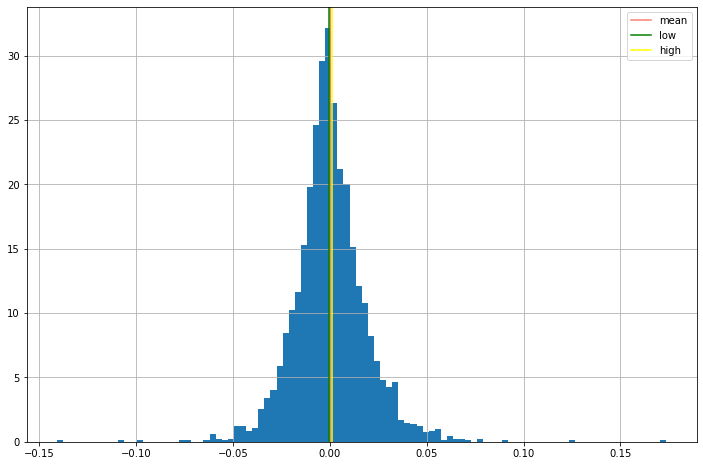

In [49]:
fig = plt.figure(figsize=(12, 8))

cmpc['return'].hist(bins=100, density=True)

plt.axvline(m, label='mean', color='salmon')
plt.axvline(low, label='low', color='green')
plt.axvline(high, label='high', color='yellow')
plt.legend()

plt.show()

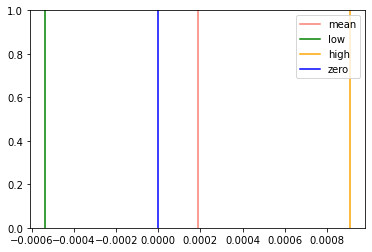

In [50]:
plt.axvline(m, label='mean', color='salmon')
plt.axvline(low, label='low', color='green')
plt.axvline(high, label='high', color='orange')
plt.axvline(0, label='zero', color='blue')
plt.legend()

plt.show()

## Statistical Testing

In [51]:
cmpc.head()

,Open,High,Low,Close,Adj Close,Volume,prev_close,return,return_2,log_return
Date,,,,,,,,,,
2012-01-02,1609.827026,1608.138672,1595.476196,1603.917847,1410.328735,3755153,NaN,NaN,NaN,NaN
2012-01-03,1603.917847,1637.684570,1612.275146,1620.632324,1425.025391,2433605,1410.328735,0.010421,0.010421,0.010367
2012-01-04,1620.632324,1637.684570,1614.891968,1628.820801,1432.225830,1828359,1425.025391,0.005053,0.005053,0.005040
2012-01-05,1628.820801,1627.048096,1616.580322,1624.093506,1428.069458,869211,1432.225830,-0.002902,-0.002902,-0.002906
2012-01-06,1624.093506,1629.242920,1604.339966,1622.742798,1426.881470,1537585,1428.069458,-0.000832,-0.000832,-0.000832


In [53]:
from scipy.stats import jarque_bera, normaltest

In [54]:
# array of cmpc return 
values

array([ 0.01042073,  0.00505285, -0.00290204, ...,  0.00138408,
        0.02073255, -0.0182803 ])

In [55]:
# p-value-we reject the null hypothesis that this data comes from normal distribution 
jarque_bera(values)

Jarque_beraResult(statistic=4364.420644940606, pvalue=0.0)

In [56]:
normaltest(values)

NormaltestResult(statistic=406.4350818672437, pvalue=5.542980446606124e-89)

In [57]:
jarque_bera(cmpc['log_return'].dropna())

Jarque_beraResult(statistic=3842.893197471637, pvalue=0.0)

In [58]:
normaltest(cmpc['log_return'].dropna())

NormaltestResult(statistic=343.6046889903444, pvalue=2.4388764925268177e-75)

In [59]:
from scipy.stats import kstest

In [60]:
df, loc, scale = t.fit(values)

def cdf(x):
    return t.cdf(x, df, loc, scale)

kstest(values, cdf)

KstestResult(statistic=0.02135652977325253, pvalue=0.18401768714541145)

In [61]:
# same but for log returns
df, loc, scale = t.fit(cmpc['log_return'].dropna())

def cdf(x):
    return t.cdf(x, df, loc, scale)

kstest(cmpc['log_return'].dropna(), cdf)

KstestResult(statistic=0.020937443343171602, pvalue=0.20178569788317136)

In [62]:
# one sample t-test
from scipy.stats import ttest_1samp

In [63]:
ttest_1samp(values, 0)

Ttest_1sampResult(statistic=0.5063132945157615, pvalue=0.6126796931125864)

In [64]:
ttest_1samp(cmpc['log_return'].dropna(), 0)

Ttest_1sampResult(statistic=0.02901249878895792, pvalue=0.9768568505714122)

try other stock

In [66]:
chevron = yf.download('CVX', start='2012-01-01', end='2022-06-09')

[*********************100%***********************]  1 of 1 completed


In [67]:
chevron.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,108.739998,110.989998,108.730003,110.370003,71.799179,11518700
2012-01-04,109.830002,110.370003,109.199997,110.180000,71.675575,8019100
2012-01-05,109.389999,109.540001,107.970001,109.099998,70.973015,7184900
2012-01-06,109.410004,109.610001,108.089996,108.309998,70.459091,8214900
2012-01-09,108.239998,109.669998,108.029999,109.489998,71.226707,7118800


<AxesSubplot:xlabel='Date'>

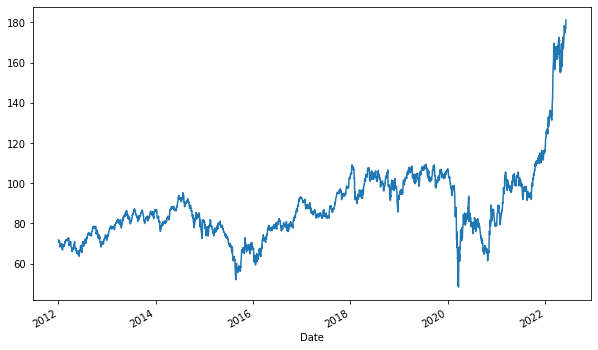

In [68]:
chevron['Adj Close'].plot(figsize=(10, 6))

In [69]:
chevron['return'] = chevron['Adj Close'].pct_change()
chevron['log_return'] = np.log(chevron['Adj Close'] + 1)

In [70]:
chevron.head(3)

,Open,High,Low,Close,Adj Close,Volume,return,log_return
Date,,,,,,,,
2012-01-03,108.739998,110.989998,108.730003,110.370003,71.799179,11518700,NaN,4.287705
2012-01-04,109.830002,110.370003,109.199997,110.180000,71.675575,8019100,-0.001722,4.286005
2012-01-05,109.389999,109.540001,107.970001,109.099998,70.973015,7184900,-0.009802,4.276291


In [71]:
chevron['return'].mean(), chevron['return'].std()

(0.0005055834574501716, 0.01743223250883042)

<AxesSubplot:>

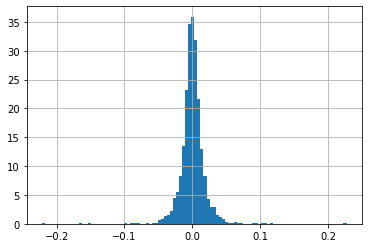

In [72]:
chevron['return'].hist(bins=100, density=True)

In [78]:
# calculate 95% confidence interval
m = chevron['return'].dropna().mean()
s = chevron['return'].dropna().std(ddof=1)

low = m - 1.96 * s / np.sqrt(len(chevron['return']))
high = m + 1.96 * s / np.sqrt(len(chevron['return']))
print(low, high, m, s)

-0.00016116454052338245 0.0011723314554237256 0.0005055834574501716 0.01743223250883042


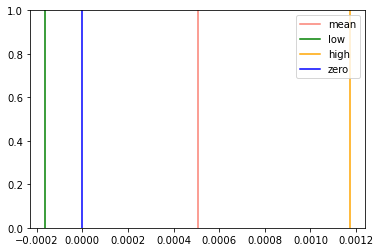

In [79]:
plt.axvline(m, label='mean', color='salmon')
plt.axvline(low, label='low', color='green')
plt.axvline(high, label='high', color='orange')
plt.axvline(0, label='zero', color='blue')
plt.legend()

plt.show()

The 95% confidence interval includes 0

In [80]:
print(low * 100, high * 100)

-0.016116454052338244 0.11723314554237256


In [81]:
ttest_1samp(chevron['return'].dropna(), 0)

Ttest_1sampResult(statistic=1.4859510375252343, pvalue=0.13741220354015135)

In [82]:
ttest_1samp(chevron['log_return'].dropna(), 0)

Ttest_1sampResult(statistic=1205.6417395013066, pvalue=0.0)

### Covariance and Correlation

In [84]:
stocks_list = ['CBL', 'AZUL', 'PFHD', 'GOOG', 'IBM']

In [86]:
assets = yf.download(stocks_list, start='2012-01-01', end='2022-06-09')['Adj Close']

[*********************100%***********************]  5 of 5 completed


In [87]:
assets.head()

,AZUL,CBL,GOOG,IBM,PFHD
Date,,,,,
2012-01-03,NaN,NaN,331.462585,121.458885,NaN
2012-01-04,NaN,NaN,332.892242,120.963379,NaN
2012-01-05,NaN,NaN,328.274536,120.389679,NaN
2012-01-06,NaN,NaN,323.796326,119.007576,NaN
2012-01-09,NaN,NaN,310.067780,118.388153,NaN


In [88]:
assets.tail()

,AZUL,CBL,GOOG,IBM,PFHD
Date,,,,,
2022-06-02,11.94,29.389999,2354.919922,140.149994,23.209999
2022-06-03,11.52,29.590000,2291.280029,141.179993,23.139999
2022-06-06,11.43,30.010000,2340.209961,142.880005,23.160000
2022-06-07,10.84,29.250000,2344.590088,142.779999,21.950001
2022-06-08,10.64,28.760000,2344.760010,140.830002,22.240000


In [92]:
assets.isna().sum().sum()

5813

In [93]:
assets.fillna(method='ffill', inplace=True)

In [94]:
assets.fillna(method='bfill', inplace=True)

In [95]:
assets.isna().sum().sum()

0

In [96]:
assets.head()

,AZUL,CBL,GOOG,IBM,PFHD
Date,,,,,
2012-01-03,21.5,30.0,331.462585,121.458885,18.85
2012-01-04,21.5,30.0,332.892242,120.963379,18.85
2012-01-05,21.5,30.0,328.274536,120.389679,18.85
2012-01-06,21.5,30.0,323.796326,119.007576,18.85
2012-01-09,21.5,30.0,310.067780,118.388153,18.85


In [99]:
returns = assets.pct_change().dropna()

In [108]:
returns.describe().T.loc[:, ['mean', 'std']]

,mean,std
AZUL,0.000285,0.032809
CBL,0.000009,0.007065
GOOG,0.000877,0.016265
IBM,0.000161,0.014437
PFHD,0.000155,0.013644


Annualized summary of statistics

In [109]:
summary = returns.describe().T.loc[:, ['mean', 'std']]
summary['mean'] = summary['mean'] * 252
summary['std'] = summary['std'] * np.sqrt(252)
summary

,mean,std
AZUL,0.071939,0.520832
CBL,0.002283,0.112151
GOOG,0.221050,0.258205
IBM,0.040630,0.229178
PFHD,0.039148,0.216585


In [110]:
# more friendly view
mean_summary = summary['mean'].astype(float).map("{:.2%}".format).to_frame()
mean_summary.rename(columns={'mean': 'annulized mean Return'}, inplace=True)
mean_summary

,annulized mean Return
AZUL,7.19%
CBL,0.23%
GOOG,22.11%
IBM,4.06%
PFHD,3.91%


In [111]:
std_summary = summary['std'].astype(float).map("{:.2%}".format).to_frame()
std_summary.rename(columns={'std': 'Risk(std)'}, inplace=True)
std_summary

,Risk(std)
AZUL,52.08%
CBL,11.22%
GOOG,25.82%
IBM,22.92%
PFHD,21.66%


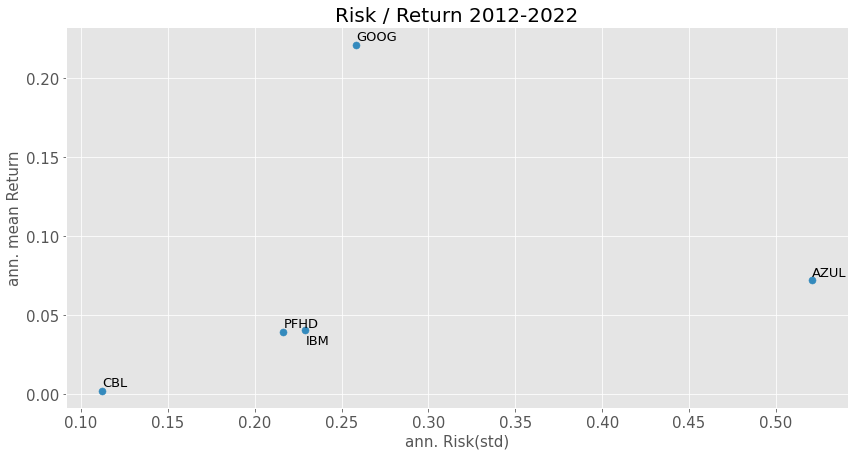

In [118]:
with plt.style.context('ggplot'):
    summary.plot.scatter(x='std', y='mean', figsize=(14, 7), s=50, fontsize=15)

for i in summary.index:
    if i == 'IBM':
        plt.annotate(i, xy=(summary.loc[i, 'std'], summary.loc[i, 'mean']-0.009), size=13)
    else:
        plt.annotate(i, xy=(summary.loc[i, 'std'], summary.loc[i, 'mean']+0.003), size=13)
    
    
        

plt.xlabel('ann. Risk(std)', fontsize=15)
plt.ylabel('ann. mean Return', fontsize=15)
plt.title('Risk / Return 2012-2022', fontsize=20)

plt.show();

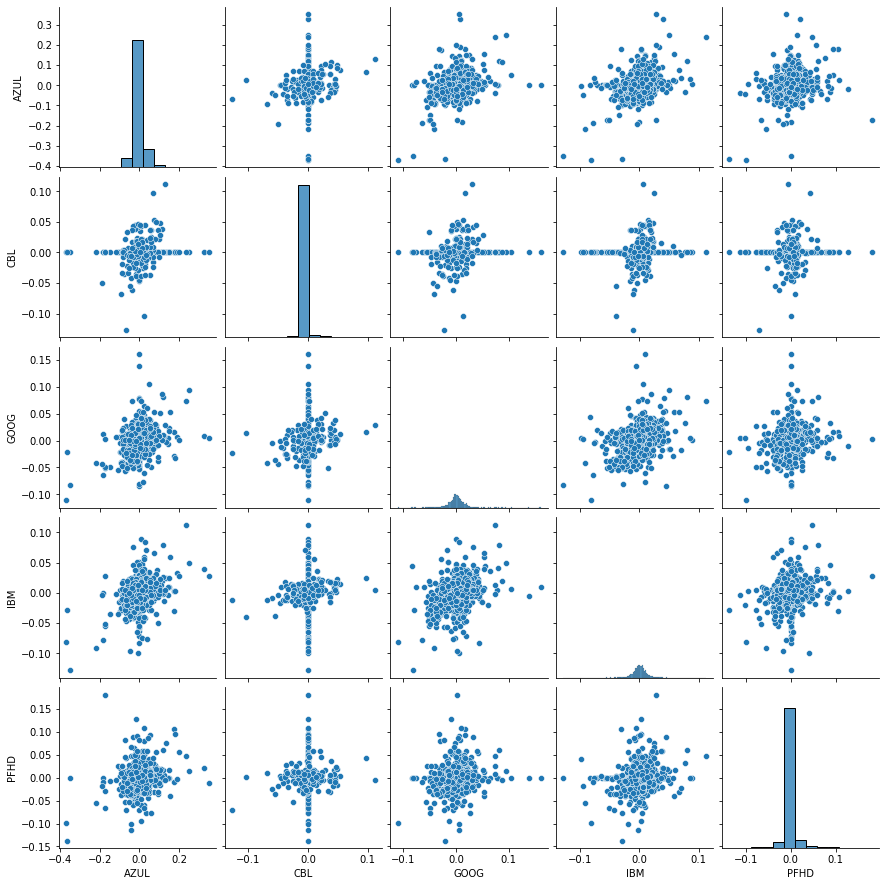

In [101]:
import seaborn as sns
sns.pairplot(returns)

In [119]:
returns.corr()

,AZUL,CBL,GOOG,IBM,PFHD
AZUL,1.000000,0.143789,0.285970,0.311011,0.196270
CBL,0.143789,1.000000,0.105254,0.090495,0.075383
GOOG,0.285970,0.105254,1.000000,0.405972,0.110609
IBM,0.311011,0.090495,0.405972,1.000000,0.163525
PFHD,0.196270,0.075383,0.110609,0.163525,1.000000


In [120]:
returns.cov()

,AZUL,CBL,GOOG,IBM,PFHD
AZUL,0.001076,0.000033,0.000153,0.000147,0.000088
CBL,0.000033,0.000050,0.000012,0.000009,0.000007
GOOG,0.000153,0.000012,0.000265,0.000095,0.000025
IBM,0.000147,0.000009,0.000095,0.000208,0.000032
PFHD,0.000088,0.000007,0.000025,0.000032,0.000186


<AxesSubplot:>

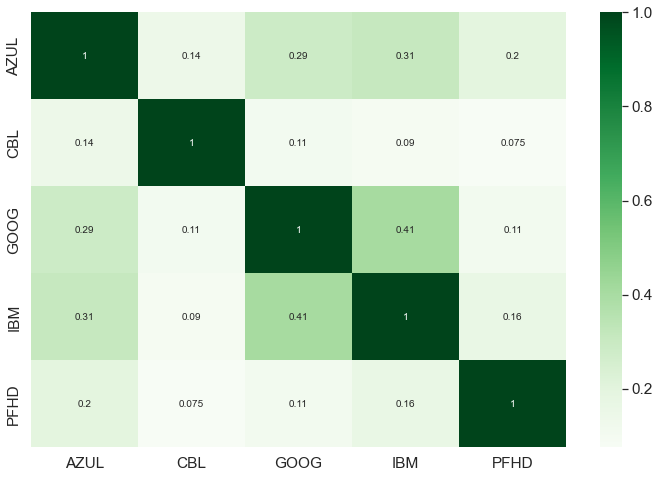

In [122]:
plt.figure(figsize=(12, 8))

sns.set(font_scale=1.4)
sns.heatmap(returns.corr(), cmap='Greens', annot=True, annot_kws={'size':10})


#### Alpha and Beta
Using returns of the market and a stock.

Ex: if B=2, then if SPY increases by 1%, AAPL increases by 26% 
    
    If SPY decreases by 5%, AAPL decreases by 10%
    
Alpha is how much better is the stock in terms of performance relative to market
     
        Alpha > 0:AAPL has outperformed the market
        Conceptually we will want high alpha stocks

In [123]:
spy = yf.download('SPY', start='2012-01-01', end='2022-06-09')['Adj Close']
spy.head()

[*********************100%***********************]  1 of 1 completed


Date
2012-01-03    104.499413
2012-01-04    104.663322
2012-01-05    104.941994
2012-01-06    104.671539
2012-01-09    104.925629
Name: Adj Close, dtype: float64

In [126]:
spy = spy.to_frame()
spy.head()

,Adj Close
Date,
2012-01-03,104.499413
2012-01-04,104.663322
2012-01-05,104.941994
2012-01-06,104.671539
2012-01-09,104.925629


In [127]:
spy['returns'] = spy['Adj Close'].pct_change()

,Adj Close,returns
Date,,
2012-01-03,104.499413,NaN
2012-01-04,104.663322,0.001569
2012-01-05,104.941994,0.002663
2012-01-06,104.671539,-0.002577
2012-01-09,104.925629,0.002427


In [128]:
spy.head()

,Adj Close,returns
Date,,
2012-01-03,104.499413,NaN
2012-01-04,104.663322,0.001569
2012-01-05,104.941994,0.002663
2012-01-06,104.671539,-0.002577
2012-01-09,104.925629,0.002427


In [131]:
compared = returns[['IBM']].join(spy['returns'])
compared.head()

,IBM,returns
Date,,
2012-01-04,-0.004080,0.001569
2012-01-05,-0.004743,0.002663
2012-01-06,-0.011480,-0.002577
2012-01-09,-0.005205,0.002427
2012-01-10,-0.001542,0.008670


In [132]:
compared.tail()

,IBM,returns
Date,,
2022-06-02,0.005164,0.019043
2022-06-03,0.007349,-0.016411
2022-06-06,0.012041,0.003045
2022-06-07,-0.000700,0.009592
2022-06-08,-0.013657,-0.010872


In [134]:
compared.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2625 entries, 2012-01-04 to 2022-06-08
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   IBM      2625 non-null   float64
 1   returns  2625 non-null   float64
dtypes: float64(2)
memory usage: 126.1 KB


In [140]:
compared.rename(columns={'returns': 'SPY'}, inplace=True)

<AxesSubplot:xlabel='Date'>

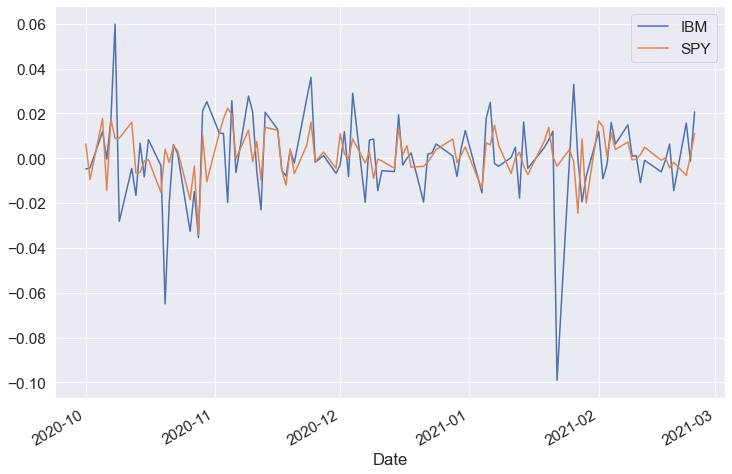

In [142]:
# change index loc(iloc) to plot different dates
compared.iloc[2200:2300].plot(figsize=(12, 8))

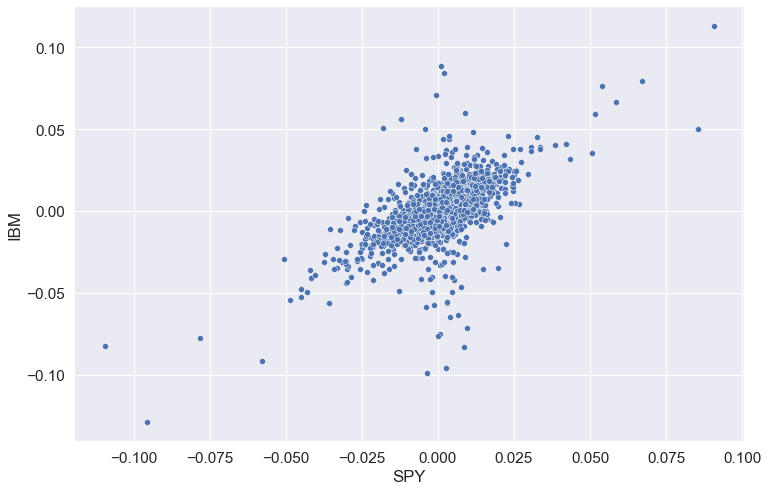

In [144]:
fig = plt.figure(figsize=(12, 8))
sns.scatterplot(data=compared, x='SPY', y='IBM')


plt.show();

In [145]:
# make dataset for LR
X = compared[['SPY']].to_numpy()
Y = compared[['IBM']].to_numpy()

In [146]:
X.shape, Y.shape

((2625, 1), (2625, 1))

In [149]:
from sklearn.linear_model import LinearRegression

In [150]:
model = LinearRegression()
model.fit(X, Y)

LinearRegression()

In [151]:
np.linspace(X.min(), X.max(), 5).reshape(-1,1)

array([[-0.10942366],
       [-0.05941694],
       [-0.00941023],
       [ 0.04059649],
       [ 0.0906032 ]])

In [152]:
X_predict = np.linspace(X.min(), X.max(), 5).reshape(-1,1)
Y_predict = model.predict(X_predict)

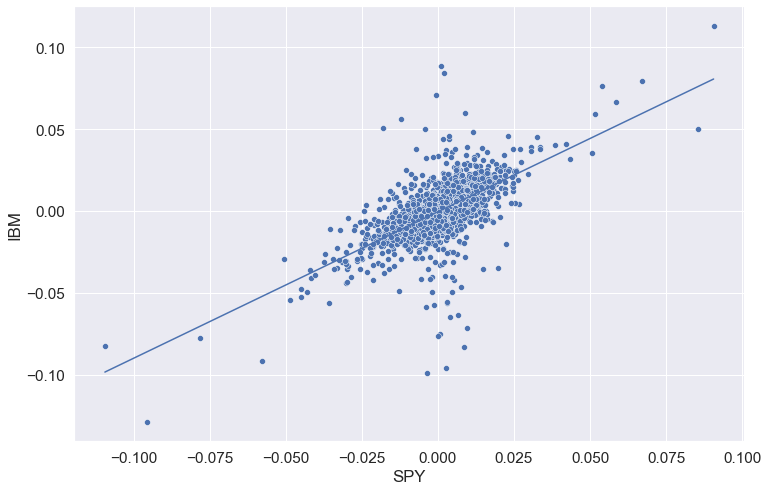

In [153]:
fig = plt.figure(figsize=(12, 8))
sns.scatterplot(data=compared, x='SPY', y='IBM')

plt.plot(X_predict, Y_predict)
plt.show();

In [154]:
beta = model.coef_
alpha = model.intercept_
alpha, beta

(array([-0.00035323]), array([[0.89505873]]))

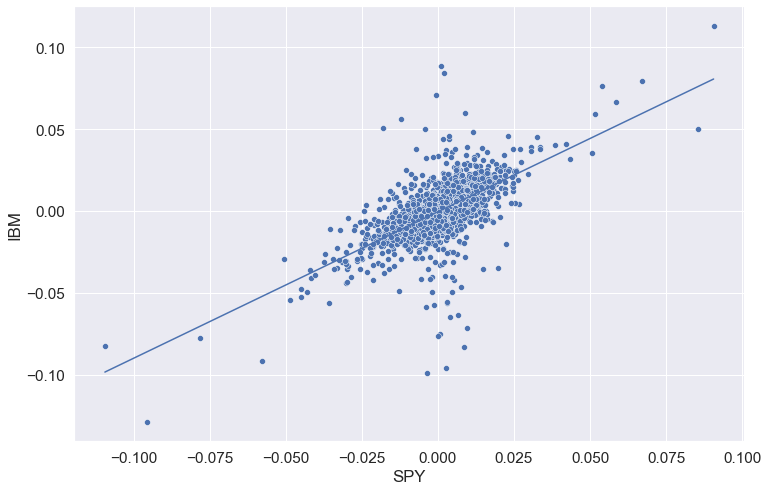

In [155]:
# Manual Calc
Y_predict = beta * X_predict + alpha

fig = plt.figure(figsize=(12, 8))
sns.scatterplot(data=compared, x='SPY', y='IBM')

plt.plot(X_predict, Y_predict)
plt.show();

In [159]:
# Annualized mean return and standar deviation
mean_std = compared.describe().T.loc[:, ['mean', 'std']]
mean_std['mean'] = mean_std['mean'] * 252
mean_std['std'] = mean_std['std'] * np.sqrt(252)
mean_std

,mean,std
IBM,0.040630,0.229178
SPY,0.144844,0.165198


In [160]:
# non annualized std
compared.std()

IBM    0.014437
SPY    0.010407
dtype: float64

### Gaussian Mixture Model GMM

In [162]:
# 500 evenly spaced data points in range[-0.1, 0.1]
x_list = np.linspace(-0.1, 0.1, 500)

In [164]:
# pdf arbitrary mixture model 
p = 0.5 # mixture proportion
fx = p * norm.pdf(x_list, loc=0, scale=0.01) + \
     (1 - p) * norm.pdf(x_list, loc=0, scale=0.002)   

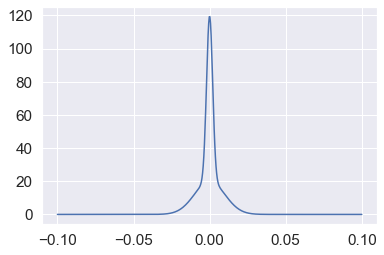

In [167]:
# characteristic of our returns 
plt.plot(x_list, fx)

In [170]:
from sklearn.mixture import GaussianMixture

In [172]:
data = cmpc['log_return'].dropna().to_numpy().reshape(-1, 1)
model = GaussianMixture(n_components=2)
model.fit(data)

GaussianMixture(n_components=2)

In [176]:
weights = model.weights_
means = model.means_
cov = model.covariances_

print(f'weights: {weights}')
print(f'means: {means}')
print(f'variances: {cov}')

weights: [0.3333767 0.6666233]
means: [[ 0.00258754]
 [-0.00127801]]
variances: [[[0.00075898]]

 [[0.00014444]]]


In [177]:
means = means.flatten()
var = cov.flatten()

In [178]:
x_list = np.linspace(data.min(), data.max(), 100)

fx0 = norm.pdf(x_list, means[0], np.sqrt(var[0]))
fx1 = norm.pdf(x_list, means[1], np.sqrt(var[1]))
fx = weights[0] * fx0 + weights[1] * fx1

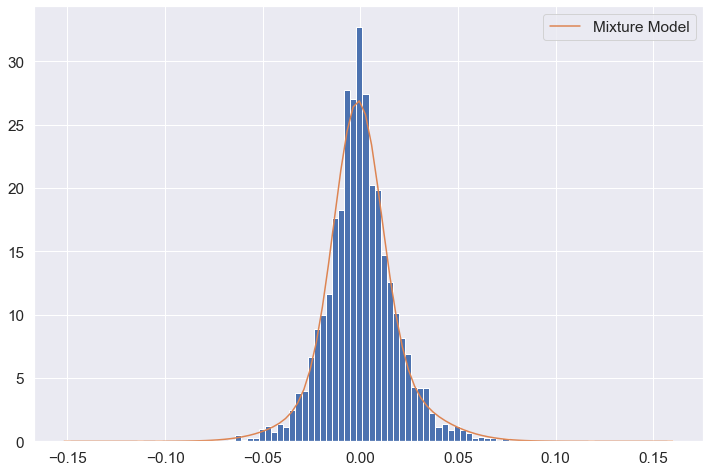

In [182]:
fig = plt.figure(figsize=(12, 8))
cmpc['log_return'].hist(bins=100, density=True)
plt.plot(x_list, fx, label='Mixture Model')
plt.legend()
plt.show();

#### Volatility Clustering
     High volatility returns are cluster near other high volatility
     Low volatility follow low volatility

In [183]:
returns.head()

,AZUL,CBL,GOOG,IBM,PFHD
Date,,,,,
2012-01-04,0.0,0.0,0.004313,-0.004080,0.0
2012-01-05,0.0,0.0,-0.013871,-0.004743,0.0
2012-01-06,0.0,0.0,-0.013642,-0.011480,0.0
2012-01-09,0.0,0.0,-0.042399,-0.005205,0.0
2012-01-10,0.0,0.0,0.001092,-0.001542,0.0


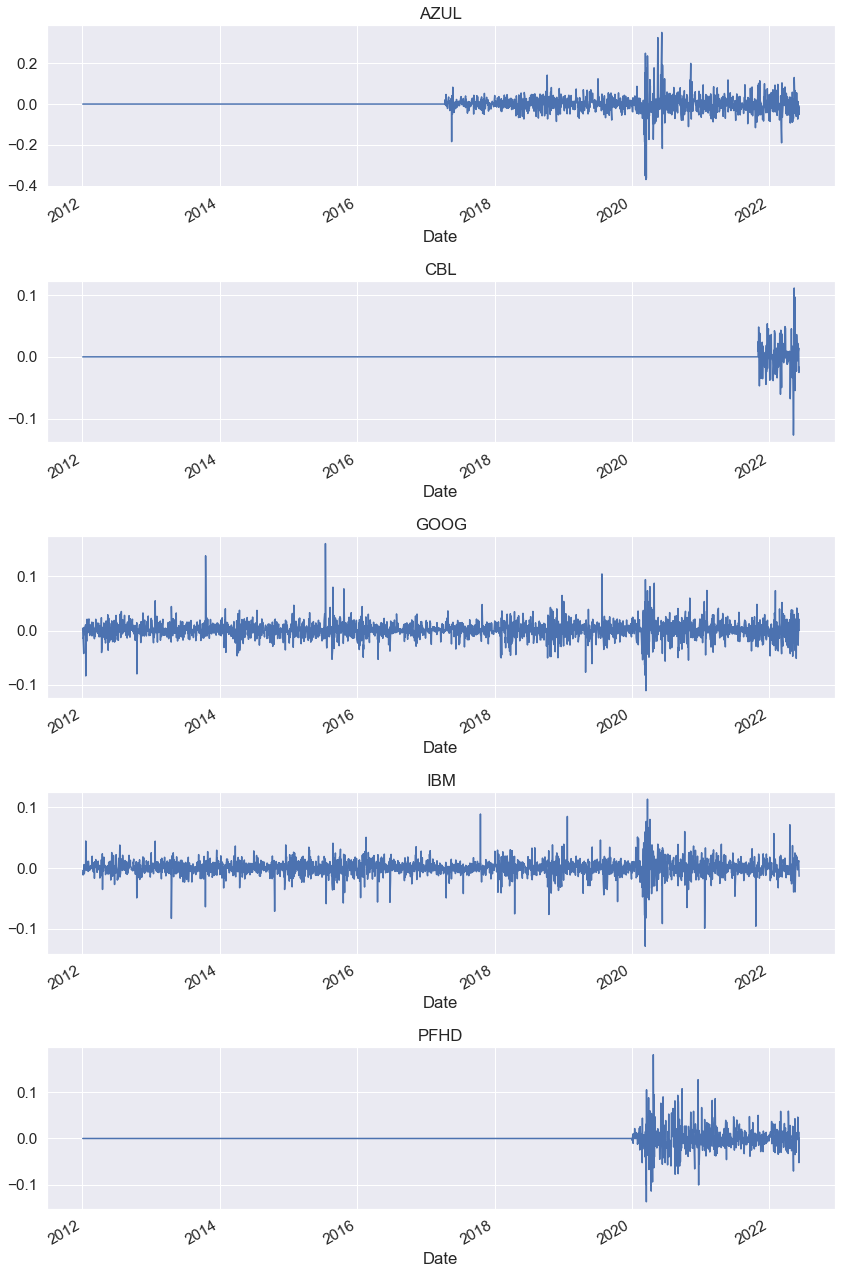

In [189]:
for i, symbol in enumerate(returns.columns):
    plt.subplot(len(returns.columns), 1, i + 1)
    plt.title(symbol)
    returns[symbol].plot(figsize=(12, 18))
                                  
plt.tight_layout()
plt.show()

### Price Simulation
Helps you understand how your algorithm will behave

    Are you confident it works under different circumstances?
    Is it robust?
    Can it potentially lose lots of money?
Two ways to do this, using historical returns or fit a distribution of the historical returns

In [201]:
cmpc.head()

,Open,High,Low,Close,Adj Close,Volume,prev_close,return,return_2,log_return
Date,,,,,,,,,,
2012-01-02,1609.827026,1608.138672,1595.476196,1603.917847,1410.328735,3755153,NaN,NaN,NaN,NaN
2012-01-03,1603.917847,1637.684570,1612.275146,1620.632324,1425.025391,2433605,1410.328735,0.010421,0.010421,0.010367
2012-01-04,1620.632324,1637.684570,1614.891968,1628.820801,1432.225830,1828359,1425.025391,0.005053,0.005053,0.005040
2012-01-05,1628.820801,1627.048096,1616.580322,1624.093506,1428.069458,869211,1432.225830,-0.002902,-0.002902,-0.002906
2012-01-06,1624.093506,1629.242920,1604.339966,1622.742798,1426.881470,1537585,1428.069458,-0.000832,-0.000832,-0.000832


price simulation using historical returns

In [205]:
p0 = cmpc.iloc[-1]['Adj Close']
prices = [p0]
cmpc_returns = cmpc['return'].dropna()

for _ in range(100):
    r = np.random.choice(cmpc_returns)
    p = prices[-1] * (1 + r)
    prices.append(p)

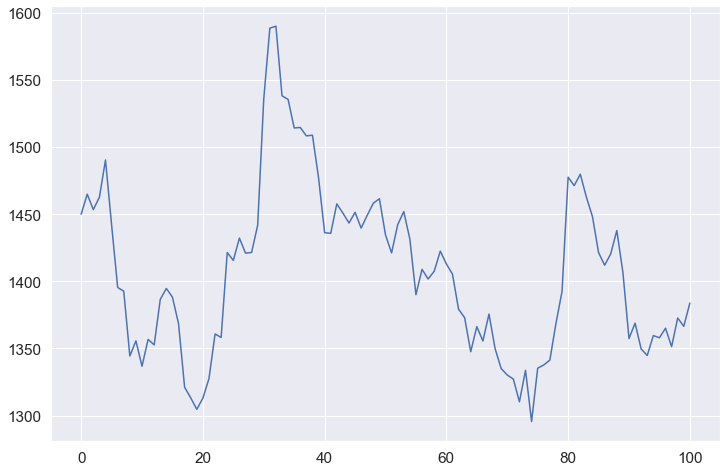

In [210]:
fig = plt.figure(figsize=(12, 8))
plt.plot(prices)
plt.show()

Price simulation using fited t-distribution

In [213]:
df, loc, scale = t.fit(cmpc['return'].dropna())
p0 = cmpc.iloc[-1]['Adj Close']
prices = [p0]

for _ in range(100):
    r = t.rvs(df, loc, scale)
    p = prices[-1] * (1 + r)
    prices.append(p)

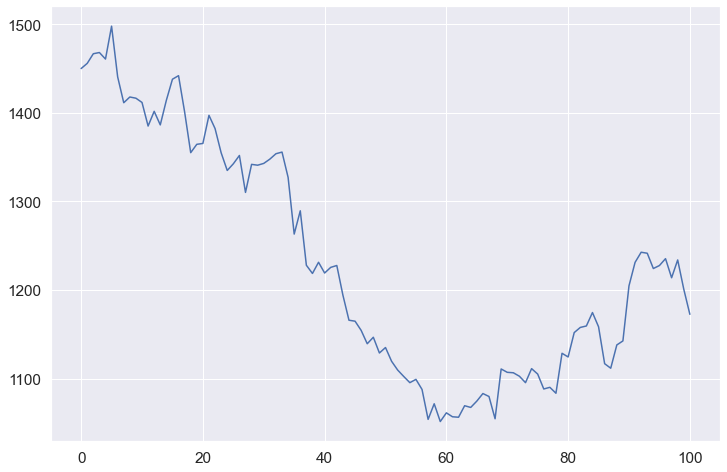

In [214]:
fig = plt.figure(figsize=(12, 8))
plt.plot(prices)
plt.show()